In [44]:
import numpy as np

class NN(object):
    def __init__(self, layers = [10 , 20, 1], activations=['sigmoid', 'relu'], usage = 'regression'):
        assert(len(layers) == len(activations)+1)
        self.layers = layers
        self.activations = activations
        self.weights = []
        self.biases = []
        self.usage = usage
        for i in range(len(layers)-1):
            self.weights.append(np.random.randn(layers[i+1], layers[i]))
            self.biases.append(np.random.randn(layers[i+1], 1))

    def feedforward(self, x):
        ai = np.copy(x)
        #print(ai.shape)
        z_s = []
        a_s = [ai]
        for i in range(len(self.weights)):
            #activation_function = self.AF(self.activations[i])
            z_s.append(self.weights[i].dot(ai) + self.biases[i])
            ai = self.AF(self.activations[i])(z_s[-1])
            a_s.append(ai)
        return (z_s, a_s)

    def backpropagation(self,y, z_s, a_s):
        dw = []  # dC/dW
        db = []  # dC/dB
        deltas = [None] * len(self.weights)  # delta = dC/dZ, error for each layer

        #out delta measurement =
        delta_out = (self.dJ(self.usage))(a_s[-1], y)
        #last layer delta
        deltas[-1] = delta_out*(self.dAF(self.activations[-1]))(z_s[-1])
        # Perform BackPropagation
        for i in reversed(range(len(deltas)-1)):
            deltas[i] = self.weights[i+1].T.dot(deltas[i+1])*(self.dAF(self.activations[i])(z_s[i]))
        #a= [print(d.shape) for d in deltas]
        batch_size = y.shape[1]
        db = [d.dot(np.ones((batch_size,1)))/float(batch_size) for d in deltas]
        dw = [d.dot(a_s[i].T)/float(batch_size) for i,d in enumerate(deltas)]
        # return the derivitives respect to weight matrix and biases
        return dw, db

    def train(self, x, y, batch_size=10, epochs=100, lr = 0.01):
        #record cost by epchos
        learning_curve = []

        #mini batch
        #assert(x.shape[0] >= batch_size*epochs)]
        indices = np.arange(x.shape[1])#debug if 0
        np.random.shuffle(indices)
        x = (x.T[indices]).T
        y = (y.T[indices]).T
        for e in range(epochs):
            i=0
            while(i<len(y)):
                x_batch = x[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                i += batch_size
                z_s, a_s = self.feedforward(x_batch)
                dw, db = self.backpropagation(y_batch, z_s, a_s)
                self.weights = [w+lr*dweight for w,dweight in  zip(self.weights, dw)]
                self.biases = [w+lr*dbias for w,dbias in  zip(self.biases, db)]
                learning_curve.append(np.linalg.norm(a_s[-1]-y_batch)) #to expand
            if(e%(epochs/10)== 0):
                print("loss = {}".format(np.linalg.norm(a_s[-1]-y_batch))) #to expand
        return learning_curve
    @staticmethod
    def AF(name):
        if(name == 'sigmoid'):
            return lambda x : np.exp(x)/(1+np.exp(x))
        elif(name == 'linear'):
            return lambda x : x
        elif(name == 'relu'):
            def relu(x):
                y = np.copy(x)
                y[y<0] = 0
                return y
            return relu
        else:
            print('unknown activation function => linear')
            return lambda x: x
    @staticmethod
    def dAF(name):
        if(name == 'sigmoid'):
            def dsig(x):
                sigx = np.exp(x)/(1+np.exp(x))
                return sigx*(1-sigx)
            return dsig
        elif(name == 'linear'):
            return lambda x: 1
        elif(name == 'relu'):
            def drelu(x):
                y = np.copy(x)
                y[y>=0] = 1
                y[y<0] = 0
                return y
            return drelu
        else:
            print('unknown activation function => linear derivative')
            return lambda x: 1

    @staticmethod
    def dJ(name):
        if(name == 'regression'):
            return lambda x, y: y-x
        if(name == 'classification'):
            return lambda x, y: np.divide(y, x) - np.divide(1 - y, 1 - x)
        else:
            print('unknown usage => regression')
            return lambda x, y: y-x


In [45]:

import matplotlib.pyplot as plt
nn = NN([1, 100, 1],activations=['sigmoid', 'sigmoid'])
X = 2*np.pi*np.random.rand(1000).reshape(1, -1)
y = np.sin(X)
    
nn.train(X, y, epochs=10000, batch_size=64, lr = .1)
_, a_s = nn.feedforward(X)
##print(y, X)
#plt.scatter(X.flatten(), y.flatten())

print(X.shape)
print(y.shape)

loss = 37.247601057871684
loss = 16.46443460292491
loss = 15.758700645822625
loss = 15.576902667267989
loss = 15.497967470504692
loss = 15.454511505222175
loss = 15.427109780970365
loss = 15.408205286065396
loss = 15.39428993311545
loss = 15.383532972726863
(1, 1000)
(1, 1000)


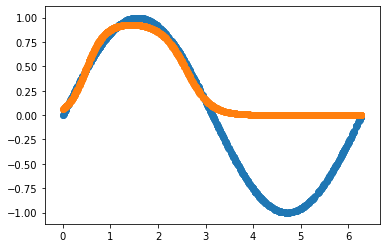

In [43]:

plt.scatter(X.flatten(), y.flatten())
plt.scatter(X.flatten(), a_s[-1].flatten())
plt.show()